In [1]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract, var
from numpy.random import randn
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
import pandas as pd
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.crypto_system import perpetuals_system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from mdi import snr
from syscore.fileutils import get_filename_for_package

# system = ct_system()
system = perpetuals_system()
rawdata = system.rawdata
data = system.data

inss = [ins for ins in system.get_instrument_list()]
ins_2_price = {ins: data.daily_prices(ins).dropna().rename(ins) for ins in inss}

# benchmark_data =  csvFuturesSimData()
# benchmark_system = simplesystem(
#     benchmark_data,
#     'paper.systems.global.yaml')

/opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/arctic/store/_pandas_ndarray_store.py:8: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel

Bad key text.latex.preview in file /opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
htt

2023-01-31 13:19:00 {'type': 'base_system'}  Following instruments are 'duplicate_markets' ['Another_thing', 'bad_thing'] 
2023-01-31 13:19:00 {'type': 'base_system'}  Following instruments are marked as 'ignore_instruments': not included: ['EXAMPLE']
2023-01-31 13:19:00 {'type': 'base_system'}  Following instruments removed entirely from sim: ['Another_thing', 'EXAMPLE', 'bad_thing']


/Users/weiranzhou/Code/pysystemtrade/sysobjects/futures_per_contract_prices.py:33: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._as_df = price_data_as_df


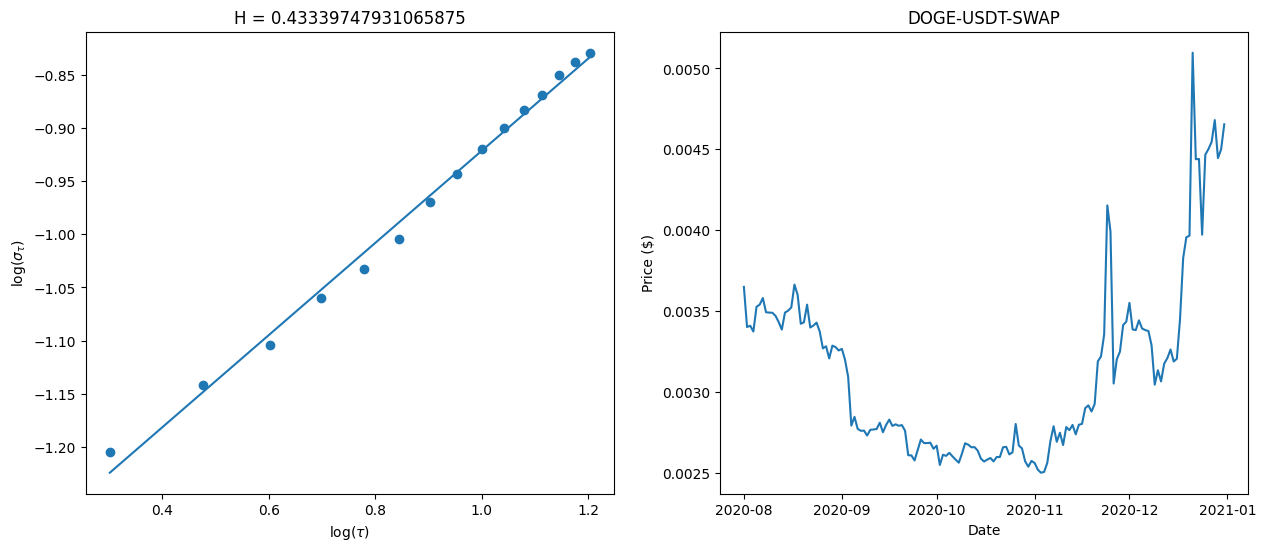

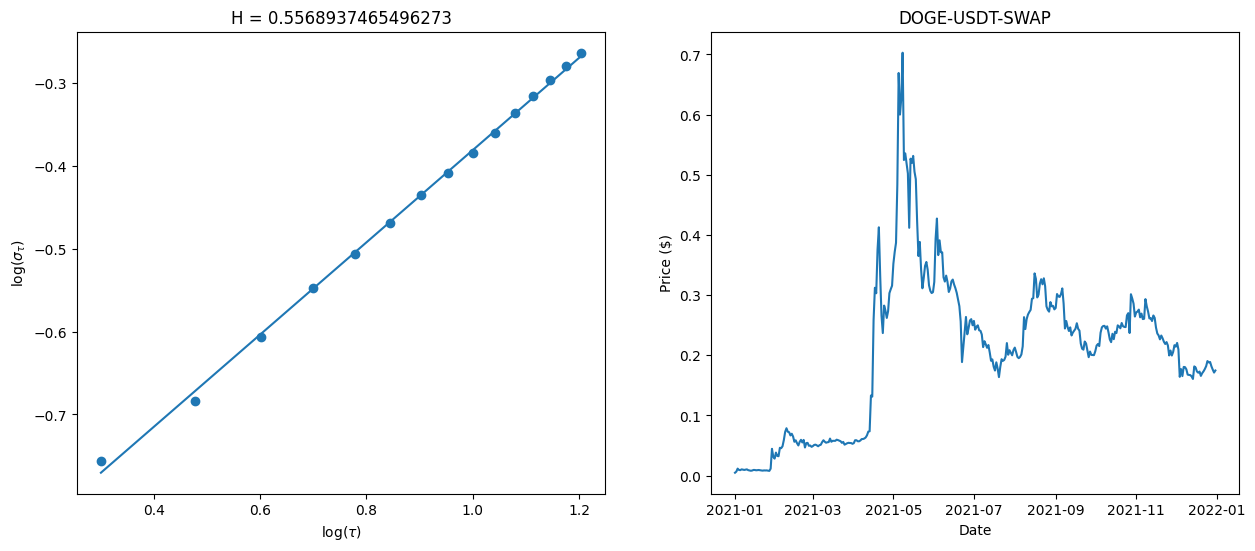

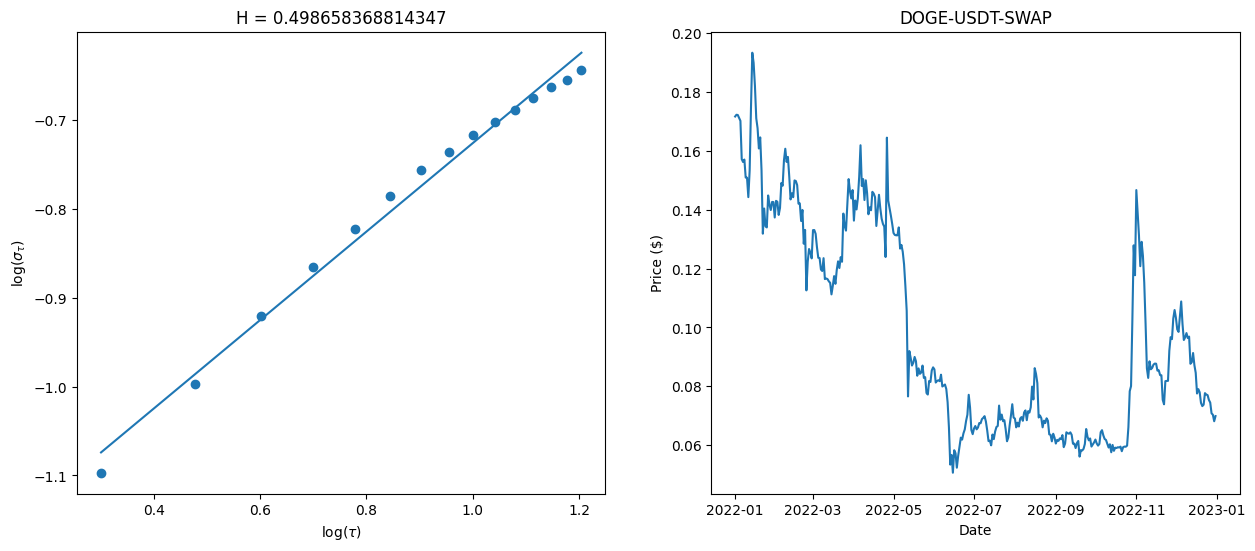

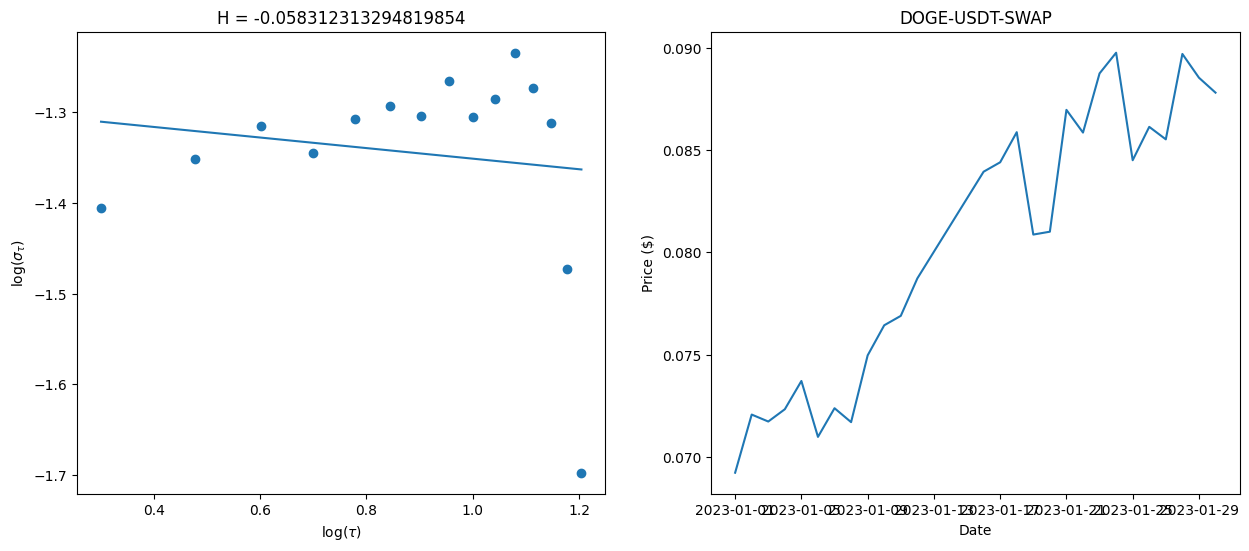

In [7]:
def hurst_exponent(price, min_lag=2, max_lag=31, plot=False):
  log_price = log(price.values)
  lags = np.arange(min_lag, max_lag + 1)
  tau = [np.std(np.subtract(log_price[lag:], log_price[:-lag])) 
    for lag in lags]
  m = np.polyfit(np.log10(lags), np.log10(tau), 1)

  if plot:
      fig, ax = plt.subplots(1, 2, figsize=(15, 6))
      ax[0].plot(np.log10(lags), m[0] * np.log10(lags) + m[1])
      ax[0].scatter(np.log10(lags), np.log10(tau))
      ax[0].set_title("H = {}".format(m[0]))
      ax[0].set_xlabel(r"log($\tau$)")
      ax[0].set_ylabel(r"log($\sigma_\tau$)")

      ax[1].plot(price)
      ax[1].set_title(f"{price.name}")
      ax[1].set_ylabel("Price ($)")
      ax[1].set_xlabel("Date")

  return m, lags, tau



# plotHurst(*hurst_exponent(gbm), gbm, "GBM")
# # plotHurst(*hurst_exponent(mr), mr, "MR")
# # plotHurst(*hurst_exponent(tr), tr, "TR")
ins  = 'BTC-USDT-SWAP'
ins  = 'ETH-USDT-SWAP'
ins  = 'BNB-USDT'
ins  = 'DOGE-USDT-SWAP'
max_lag = 16
for year in [2020, 2021, 2022, 2023]:
  price = ins_2_price[ins]
  price = price[price.index.year == int(year)]
  hurst_exponent(price, plot=True, max_lag=max_lag)
  plt.show()

# for log_benchmark_price in log_benchmark_period_price:
#   rs = []
#   for ml in range(3, 600):
#     rs.append(hurst_exponent(log_benchmark_price, max_lag=ml)[0][0])
#   pd.Series(rs).plot()
#   plt.show()

In [2]:
# benchmark_ins = 'SN'
# benchmark_price = system.data.daily_prices(benchmark_ins).dropna()

benchmark_ins = 'SP500'
benchmark_price = benchmark_system.data.daily_prices(benchmark_ins).dropna()
benchmark_period = [('1900-01-01', '2000-01-01'), ('2000-01-01', '2008-01-01'), ('2008-01-01', '2025-01-01')]

# benchmark_ins = 'CHF'
# benchmark_price = benchmark_system.data.daily_prices(benchmark_ins).dropna()

# benchmark_ins = 'BITCOIN'
# benchmark_price = benchmark_system.data.daily_prices(benchmark_ins).dropna()

benchmark_period_price = [benchmark_price[(benchmark_price.index >= period[0]) & (benchmark_price.index < period[1])] for period in benchmark_period]
log_benchmark_period_price = [log(tmp.values) for tmp in benchmark_period_price]
for tmp in benchmark_period_price:
    tmp.plot()
    plt.show()

#Creating a Gometric Brownian Motion, Mean-Reverting and Trending Series
# gbm = log(cumsum(randn(100000))+1000)
# mr = log(randn(100000)+1000)
# tr = log(cumsum(randn(100000)+1)+1000)

NameError: name 'benchmark_system' is not defined

In [ ]:
vals = {c: hurst(prices[c].values) for c in prices.keys()}

def plotHurst(m, x, y, series, name):
    return m[0]
#     fig, ax = plt.subplots(1, 2, figsize=(15, 6))
#     ax[0].plot(np.log10(x), m[0] * np.log10(x) + m[1]) 
#     ax[0].scatter(np.log10(x), np.log10(y))
#     ax[0].set_title(f"{name} (H = {m[0]:.3f})")
#     ax[0].set_xlabel(r"log($\tau$)")
#     ax[0].set_ylabel(r"log($\sigma_\tau$)")
    
#     ax[1].plot(series)
#     ax[1].set_title(f"{name}")
#     ax[1].set_ylabel("Price ($)")
#     ax[1].set_xlabel("Date")
    
#     return fig, ax

pd.DataFrame({k:[plotHurst(*v, prices[k], k)] for k, v in vals.items()}).T.sort_values(0)

/var/folders/4h/vzvj91h930v6vjrf1_4jwcnh0000gn/T/ipykernel_80058/547120278.py:6: RuntimeWarning: invalid value encountered in log
  ts = np.log(ts)


,0
SA,0.370610
EG,0.423776
AG,0.428308
AU,0.446220
SR,0.455244
FU,0.455433
MA,0.458002
L,0.460581
BU,0.461566
CU,0.476651
